# Using a profiler to kick-start your Exploratory Data Analysis

**Achievement:** Illustrate the use of pandas_profiling as a quick way to explore your data.

## Introduction

In this notebook, we will introduce a tool to help you analyze your data. Given our time constraints for this workshop, a tool like this will help us get a quick glimpse of the analysis. Like with all tools you may use, it is really important to understand what they do under the hood, the assumtions they make and the automatic choices they take for you. Thus by using open source tools, or tools where the code is available, you will be able to scrutinize the approach and the implementation details.

The use of automated tools is only encouraged as a starting point to get some inspiration about the possibilities. The important bit is the questions you ask, and evaluate if the data collected contains the signal needed to solve the problem at hand.

[Pandas profiling](https://github.com/ydataai/pandas-profiling) is a tool to generate profile reports from a pandas dataframe. For each column, the following information (whenever relevant for the column type) is presented in an interactive HTML report:

 - Type inference: detect the types of columns in a DataFrame
 - Essentials: type, unique values, indication of missing values
 - Quantile statistics: minimum value, Q1, median, Q3, maximum, range, interquartile range
 - Descriptive statistics: mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness
 - Most frequent and extreme values
 - Histograms: categorical and numerical
 - Correlations: high correlation warnings, based on different correlation metrics (Spearman, Pearson, Kendall, Cramér’s V, Phik)
 - Missing values: through counts, matrix, heatmap and dendrograms
 - Duplicate rows: list of the most common duplicated rows
 - Text analysis: most common categories (uppercase, lowercase, separator), scripts (Latin, Cyrillic) and blocks (ASCII, Cyrilic)
 - File and Image analysis: file sizes, creation dates, dimensions, indication of truncated images and existance of EXIF metadata
 
 
 The report contains three additional sections:

 - Overview: mostly global details about the dataset (number of records, number of variables, overall missigness and duplicates, memory footprint)
 - Alerts: a comprehensive and automatic list of potential data quality issues (high correlation, skewness, uniformity, zeros, missing values, constant values, between others)
 - Reproduction: technical details about the analysis (time, version and configuration)

 ## Metadata

 The dataset `diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015.csv` was created from the [following source](https://www.kaggle.com/code/alexteboul/diabetes-health-indicators-dataset-notebook). Here is the meaning of the columns ([full source](https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf)) that we have collected for you:

| Variable | Description | Type |
|:-|:-|:-|
|Diabetes_binary| 0 meaning non-diabetic and pre-diabetic and 1 meaning diabetic.| Binary |
|HighBP               | Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional. | Binary. 0 - No. 1 - Yes. |
|HighChol             | Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high?  | Binary. 0 - No, 1 - Yes. |
|CholCheck            | Cholesterol check within past five years. | Binary. 0 - No. 1 - Yes. | 
|BMI                  | Body mass index. | Float. |
|Smoker               | Have you smoked at least 100 cigarettes in your entire life?  | Binary. 0 - No. 1 - Yes.|
|Stroke               | Have you ever had a stroke?| Binary. 0 - No. 1 - Yes. |
|HeartDiseaseorAttack | Have you ever had a coronary heart disease (CHD) or myocardial infarction (MI)? | Binary. 0 - No. 1 - Yes. |
|PhysActivity         | Do you do physical activity or exercise during the past 30 days other than their regular job? | Binary. 0 - No. 1 - Yes. |
|Fruits               | Do you consume Fruit 1 or more times per day? | Binary. 0 - No. 1 - Yes. |
|Veggies              | do you consume Vegetables 1 or more times per day?  | Binary. 0 - No. 1 - Yes. |
|HvyAlcoholConsump    | Are you a Heavy drinker? (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) | Binary. 0 - No. 1 - Yes. |
|AnyHealthcare        | Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? | Binary. 0 - No. 1 - Yes. |
|NoDocbcCost          | Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? | Binary. 0 - No. 1 - Yes |
|GenHlth              | Would you say that in general your health is? | Categorical. 1 - Excellent, 2 - Very Good, 3 - Good, 4 - Fair, 5 - Poor |
|MentHlth             | Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? | Categorical. 1-30. |
|PhysHlth             | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? | Categorical. 1-30. |
|DiffWalk             | Do you have serious difficulty walking or climbing stairs? | Binary. 0 - No. 1 - Yes. |
|Sex                  | Indicate sex of respondent | Binary. 0 - Female, 1 - Male.|
|Age                  | Thirteen-level age category of the respondent | 1 Age 18 to 24,2 Age 25 to 29,3 Age 30 to 34,4 Age 35 to 39,5 Age 40 to 44,6 Age 45 to 49,7 Age 50 to 54,8 Age 55 to 59,9 Age 60 to 64,10 Age 65 to 69,11 Age 70 to 74,12 Age 75 to 79,13 Age 80 or older|
|Education            | What is the highest grade or year of school you completed? | Categorical. 1 - Never attended school or kindergarten, 2 - Elementary school, 3 - Secondary school, 4 - Graduated High School, 5 - Attended College or Technical School, 6 - Graduated College or Technical school.  |
|Income | | Categorical. Less than: 0 - $10K, 1 - $15K, 2 - $20K, 3 - $25K, 4 - $30K, 5 - $35K, 6 - $50K, 7 - $75K, 8 - $75K or more |

From the [Diabetes Health Indicators Dataset Notebook](https://www.kaggle.com/code/alexteboul/diabetes-health-indicators-dataset-notebook), the author has identified the following risk factors for diabetes and other chronic illnesses like heart disease (not in strict order of importance):

- blood pressure (high)
- cholesterol (high)
- smoking
- diabetes
- obesity
- age
- sex
- race
- diet
- exercise
- alcohol consumption
- BMI
- Household Income
- Marital Status
- Sleep
- Time since last checkup
- Education
- Health care coverage
- Mental Health

After checking what the columns mean, think about the following:

- What columns does it make sense to use for this problem?
- Look at how the questions where posed and think about how you would have answered. Do you think the data in that column is picking up the right signal to solve this task?
- What are the pitfalls of using all the data available? 
- How well does this dataset represents reality? Or what population is being represented correctly by this dataset?
- Would you use this dataset to solve a problem in the real world?
- What other questions are important to ask at this stage?

# Reproducibility and code formatting

In [2]:
# To watermark the environment
%load_ext watermark

# For automatic code formatting in jupyter lab.
%load_ext lab_black

# For automatic code formatting in jupyter notebook
%load_ext nb_black

# For better logging
%load_ext rich

# Analysis

We proceed to the analysis part.

In [3]:
# Imports
# -------

# System
import sys

# Logging
import logging

# Rich logging in jupyter
from rich.logging import RichHandler

FORMAT = "%(message)s"
logging.basicConfig(
    level="WARN", format=FORMAT, datefmt="[%X]", handlers=[RichHandler()]
)

log = logging.getLogger("rich")

# Packages from workshop
import workshop.transform as wt

# Packages for pandas profiling
import pandas as pd
from pandas_profiling import ProfileReport

# Packages for ppscore
%matplotlib inline
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt

RANDOM_SEED = 42

In [4]:
# Load the data:
datapath = "../data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv.zip"
df = pd.read_csv(datapath, compression="zip")

In [5]:
# Check the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [6]:
# Generate the profile report
profile = ProfileReport(df, title="Profiling: Diabetes Binary 50-50 split")

In [7]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<iframe width="100%" height="800px" srcdoc="<!doctype html><html lang=en><head><meta charset=utf-8><meta name=viewport content="width=device-width, initial-scale=1, shrink-to-fit=no"><meta name=description content="Profile report generated with the `pandas-profiling` Python package"><meta name=author content="Simon Brugman and the open source community."><meta name=generator content="Pandas Profiling v3.2.0"><meta name=url content=https://github.com/pandas-profiling/pandas-profiling><meta name=date content="2022-09-30 07:50:41.423844"><title>Profiling: Diabetes Binary 50-50 split</title><style>
/*!
 * Bootstrap v3.3.7 (http://getbootstrap.com)
 * Copyright 2011-2016 Twitter, Inc.
 * Licensed under MIT (https://github.com/twbs/bootstrap/blob/master/LICENSE)
 *//*! normalize.css v3.0.3 | MIT License | github.com/necolas/normalize.css */html{font-family:sans-serif;-webkit-text-size-adjust:100%;-ms-text-size-adjust:100%}body{margin:0}article,aside,details,figcaption,figure,footer,header,hgroup,main,menu,nav,section,summary{display:block}audio,canvas,progress,video{display:inline-block;vertical-align:baseline}audio:not([controls]){display:none;height:0}[hidden],template{display:none}a{background-color:transparent}a:active,a:hover{outline:0}abbr[title]{border-bottom:1px dotted}b,strong{font-weight:700}dfn{font-style:italic}h1{margin:.67em 0;font-size:2em}mark{color:#000;background:#ff0}small{font-size:80%}sub,sup{position:relative;font-size:75%;line-height:0;vertical-align:baseline}sup{top:-.5em}sub{bottom:-.25em}img{border:0}svg:not(:root){overflow:hidden}figure{margin:1em 40px}hr{height:0;-webkit-box-sizing:content-box;-moz-box-sizing:content-box;box-sizing:content-box}pre{overflow:auto}code,kbd,pre,samp{font-family:monospace,monospace;font-size:1em}button,input,optgroup,select,textarea{margin:0;font:inherit;color:inherit}button{overflow:visible}button,select{text-transform:none}button,html input[type=button],input[type=reset],input[type=submit]{-webkit-appearance:button;cursor:pointer}button[disabled],html input[disabled]{cursor:default}button::-moz-focus-inner,input::-moz-focus-inner{padding:0;border:0}input{line-height:normal}input[type=checkbox],input[type=radio]{-webkit-box-sizing:border-box;-moz-box-sizing:border-box;box-sizing:border-box;padding:0}input[type=number]::-webkit-inner-spin-button,input[type=number]::-webkit-outer-spin-button{height:auto}input[type=search]{-webkit-box-sizing:content-box;-moz-box-sizing:content-box;box-sizing:content-box;-webkit-appearance:textfield}input[type=search]::-webkit-search-cancel-button,input[type=search]::-webkit-search-decoration{-webkit-appearance:none}fieldset{padding:.35em .625em .75em;margin:0 2px;border:1px solid silver}legend{padding:0;border:0}textarea{overflow:auto}optgroup{font-weight:700}table{border-spacing:0;border-collapse:collapse}td,th{padding:0}/*! Source: https://github.com/h5bp/html5-boilerplate/blob/master/src/css/main.css */@media print{*,:after,:before{color:#000!important;text-shadow:none!important;background:0 0!important;-webkit-box-shadow:none!important;box-shadow:none!important}a,a:visited{text-decoration:underline}a[href]:after{content:" (" attr(href) ")"}abbr[title]:after{content:" (" attr(title) ")"}a[href^="javascript:"]:after,a[href^="#"]:after{content:""}blockquote,pre{border:1px solid #999;page-break-inside:avoid}thead{display:table-header-group}img,tr{page-break-inside:avoid}img{max-width:100%!important}h2,h3,p{orphans:3;widows:3}h2,h3{page-break-after:avoid}.navbar{display:none}.btn>.caret,.dropup>.btn>.caret{border-top-color:#000!important}.label{border:1px solid #000}.table{border-collapse:collapse!important}.table td,.table th{background-color:#fff!important}.table-bordered td,.table-bordered th{border:1px solid #ddd!important}}@font-face{font-family:'Glyphicons Halflings';src:url(../fonts/glyphicons-halflings-regular.eot);src:url(../fonts/glyphicons-halflings-regular.eot?#iefix) format('embedded-opentype'),url(../fonts/glyphicons-halflings-regul

In [8]:
# Export the results to file
profile.to_file("diabetes_binary_5050.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Calculate the predictive power score

The above profiling tool calculates the (linear) correlation between variables. You may ask, can we also look at the non-linear relationships in the data?

The [PPS](https://github.com/8080labs/ppscore) is an asymmetric, data-type-agnostic score that can detect linear or non-linear relationships between two columns. The score ranges from 0 (no predictive power) to 1 (perfect predictive power). It can be used as an alternative to the correlation (matrix).

The algorithm chooses 1 variable at a time and fits a decision tree, to calculate the power that feature has to predict the outcome. 

Beware! There are also several hyper-parameters one can configure. In this notebook we just take the defalts to illustrate the technique.

In [9]:
# Need to convert the categorical variables to string to use the classification setup
# otherwise it will use the regression setup.
# What would have happened if we hadn't read the docs for this tool, right?
cols_to_str = [
    "Diabetes_binary",
    "HighBP",
    "HighChol",
    "CholCheck",
    "Smoker",
    "Stroke",
    "HeartDiseaseorAttack",
    "PhysActivity",
    "Fruits",
    "Veggies",
    "HvyAlcoholConsump",
    "AnyHealthcare",
    "NoDocbcCost",
    "GenHlth",
    "DiffWalk",
    "Sex",
]
# These are really ordinal and not categorical
# Thus we don't convert them to strings
#    "Age",
#    "Education",
#    "Income",

target_column = "Diabetes_binary"

data_transformed = df.pipe(wt.start_pipeline).pipe(wt.cols_to_str, cols=cols_to_str)

Executed step start_pipeline shape=(70692, 22) took 0:00:00.002255s
Executed step cols_to_str shape=(70692, 22) took 0:00:00.334907s


In [10]:
# calculate the pps matrix, use all data
matrix_df = pps.matrix(
    data_transformed, sample=None, random_seed=RANDOM_SEED, invalid_score=0
)[["x", "y", "ppscore"]].pivot(columns="x", index="y", values="ppscore")

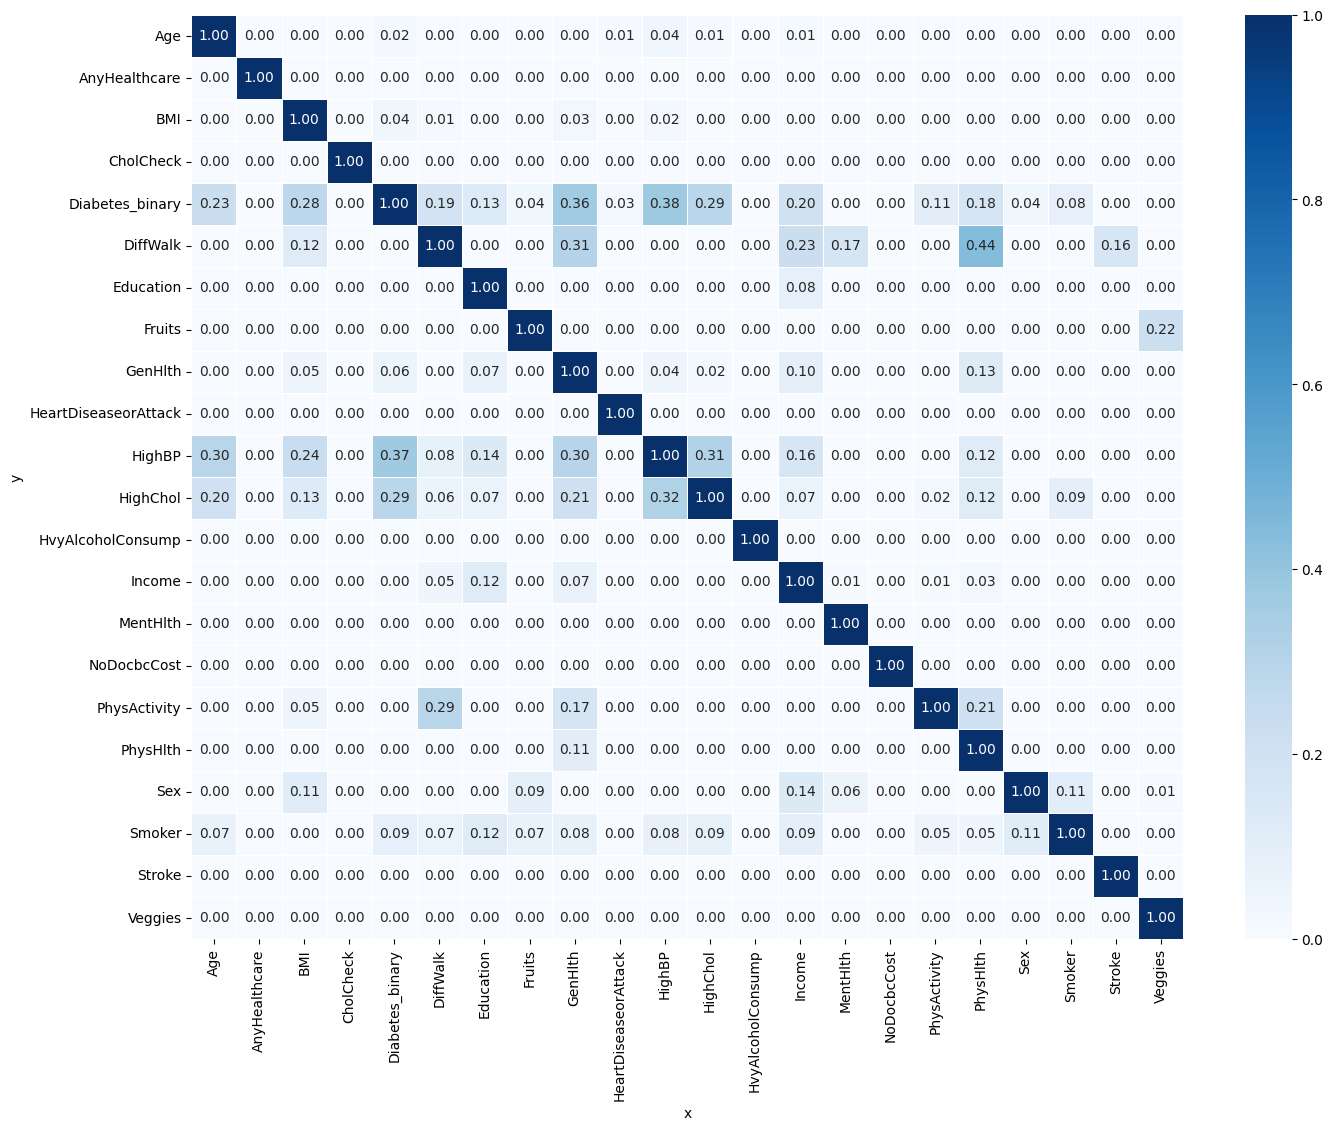

In [11]:
# The default figure size is too small
plt.figure(figsize=(16, 12))

# Display the matrix
heatmap_plot = sns.heatmap(
    matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True, fmt=".2f"
)

In [12]:
# We now calculate the score between each variable and the predicted column
predictors_df = pps.predictors(
    df, y=target_column, sample=None, random_seed=42, invalid_score=0
)

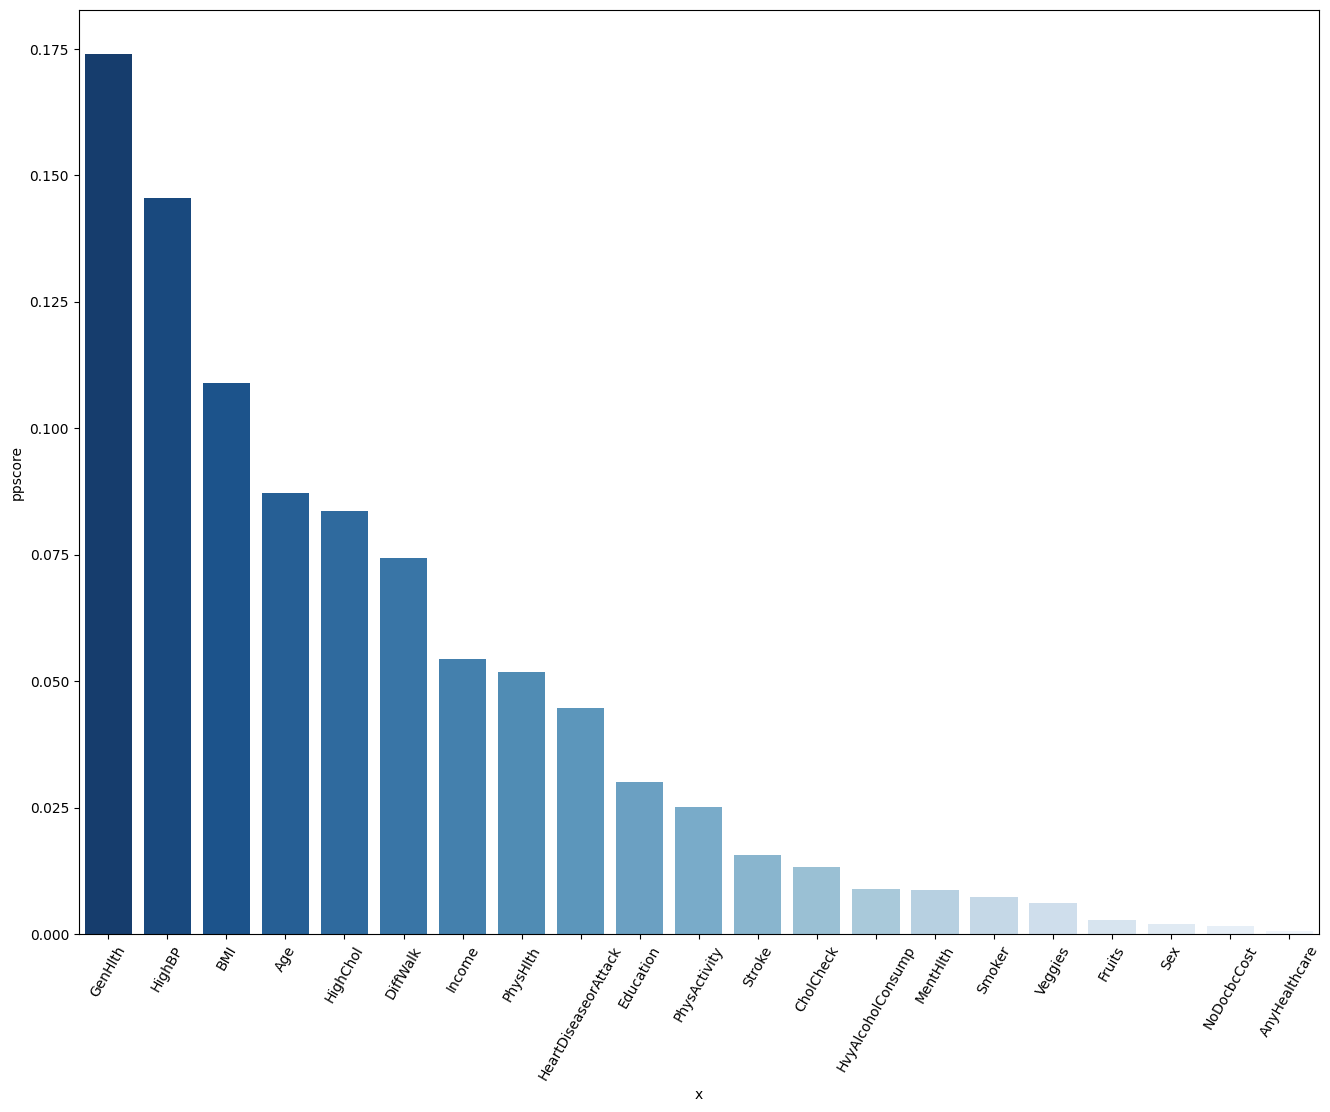

In [13]:
# Make figure bigger
plt.figure(figsize=(16, 12))

# Create a bar plot
bar_plot = sns.barplot(data=predictors_df, x="x", y="ppscore", palette="Blues_r")
for item in bar_plot.get_xticklabels():
    item.set_rotation(60)

It is important no to focus so much on the values, but on the ranking. One can experiment with different hyper-parameters, but it is good practice to check that the ranking is stable.

## Check other approaches

After running this notebook and exploring the results, you can use some time to go through the following [EDA analysis](https://www.kaggle.com/code/bharat04/diabetes-detailed-eda-with-conclusion) from Kaggle. 

- How is their approach compared to yours? 
- What charts did they focused more on?
- Did you find patterns or questions not identified by the other notebook? Or viceversa?

## Feature engineering

A good exploratory data analysis is the basis of a good feature engineering. You have to know your data, how it was collected / generated, in order to decide if further transformations are needed to craft your machine learning model.

If you were curious enough, and looked through the ([full source](https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf)) of the questions, you may have noticed that the authors of that document were already doing some feature engineering. Usually, you have to talk to the domain experts to look into what features make sense. Here are some examples taken from that document, and some are ours:

- Education. The meaning of the values for this feature is a bit confusing. We could standardize the data a bit more by only having 3 categories:
   - `0`: Graduated from Secondary school, 
   - `1`: Graduated from High School, 
   - `2`: Graduated from College or Technical school.
- Mental Health. This is a hard one to answer. I usally don't think about my mental health by counting the days I'm depressed. So recalling how many times I've felt down in the last 30 days is prone to errors. One could bucketize the days, to get 4 categories:
   - `0`: Haven't felt stress, depression, and problems with emotions in the last 30 days
   - `1`: Felt stress/depression/problems with emotions for 1 to 10 days
   - `2`: Felt stress/depression/problems with emotions for 11 to 20 days
   - `3`: Felt stress/depression/problems with emotions for 21 to 30 days
- Physical Health: Same as for mental health.
- Income. Divide into `0-15K`, `15K-25K`, `25K-35K`, `35K-50K`, `>50K`.

# Datasheets for datasets

This is a standard for documenting datasets from [Microsoft](https://www.microsoft.com/en-us/research/project/datasheets-for-datasets/). It is a great starting point for using data responsibly. We quote here the nice introduction from this template:

> Data is central to the development and evaluation of machine learning models. Many responsible AI
harms can be traced back to characteristics of datasets. For example, lack of appropriate
representation of different groups of people can lead to models that exhibit performance disparities.
Spurious correlations and other unanticipated anomalies in training datasets can result in models that
fail to generalize. Subjectivity in dataset labels and inaccurate notions of ground truth can result in
models with misleading outputs.

> Documenting datasets helps promote more deliberate reflection and transparency about how these
datasets might affect machine learning models. For dataset creators, documenting your data can help
you think through underlying assumptions, potential risks, and implications of use. It can also help
dataset consumers—those who will use a dataset to develop or evaluate their models—make informed
decisions about whether specific datasets meet their needs, and what limitations they need to consider.
For these reasons, good data documentation practices are an essential component of responsible AI.

> [This template](https://www.microsoft.com/en-us/research/uploads/prod/2022/07/aether-datadoc-082522.pdf) includes questions that dataset creators should think through and document the answers
to. However, it is not meant to be prescriptive. There is no one-size-fits-all format for data
documentation. You are encouraged to adapt this template to suit your team’s needs and the type of
datasets you use. If some questions do not apply to your situation or dataset, it’s fine to drop them. You
may also choose to integrate these questions into your existing tools and workflows rather than
answering them in the template itself.

We encourage to use this standard for you data, by using the questions that make sense for your use case. You should also openly distribute this template together with your data, so that others who reuse it, will benefit from it.

# Watermark

This should be the last section of your notebook, since it watermarks all your environment.

When commiting this notebook, remember to restart the kernel, rerun the notebook and run this cell last, to watermark the environment.

In [14]:
%watermark -gb -iv -m -v

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.5.0

Compiler    : Clang 12.0.1 
OS          : Darwin
Release     : 21.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 12
Architecture: 64bit

Git hash: 32bf5d7272dee14eb8e8e5ceb3b8c0bdd18c28fa

Git branch: main

workshop  : 0.0.1
pandas    : 1.4.3
matplotlib: 3.6.0
sys       : 3.8.13 | packaged by conda-forge | (default, Mar 25 2022, 06:06:49) 
[Clang 12.0.1 ]
logging   : 0.5.1.2
ppscore   : 1.1.0
seaborn   : 0.11.2

